In [1203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import sqrt

%matplotlib inline
from sklearn import datasets
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split



In [1204]:
salary = pd.read_csv ('/Users/allanwaweru/Downloads/csci3360 finalproject/2017salary.csv')

stats = pd.read_csv ('/Users/allanwaweru/Downloads/csci3360 finalproject/2017seasonstats.csv')


/Users/allanwaweru/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1205]:

stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.0,...,1.0,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
1,2.0,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,12.0,...,1.0,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
2,3.0,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,17.0,...,1.0,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
3,4.0,2017.0,Arron Afflalo,SG,31.0,SAC,61.0,45.0,1580.0,9.0,...,1.0,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
4,5.0,2017.0,Alexis Ajinca,C,28.0,NOP,39.0,15.0,584.0,13.0,...,1.0,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0


In [1206]:
salary.head()

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [1207]:
salary = salary[['Player', 'season17_18']]
salary.rename(columns={'season17_18':'salary17_18'},inplace = True)
salary['salary17_18'] = salary['salary17_18'].astype(int) 


In [1208]:
stats = stats[['Year','Player','Pos','Age','G','PER', 'MP','PTS','AST','TRB','TOV','BLK','STL']]




In [1209]:
salary.columns

Index(['Player', 'salary17_18'], dtype='object')

In [1210]:
stats.columns

Index(['Year', 'Player', 'Pos', 'Age', 'G', 'PER', 'MP', 'PTS', 'AST', 'TRB',
       'TOV', 'BLK', 'STL'],
      dtype='object')

In [1211]:
stats_salary.drop_duplicates(subset=['Player'], keep='first',inplace=True)
stats_salary.head(10)


,Year,Player,Pos,Age,G,PER,MPG,APG,RPG,TOPG,BPG,SPG,PPG,salary17_18
426,2017.0,Russell Westbrook,PG,28.0,81.0,31.0,34.592593,10.370370,10.666667,5.407407,0.382716,1.641975,31.580247,28530608
169,2017.0,James Harden,PG,27.0,81.0,27.0,36.382716,11.185185,8.135802,5.728395,0.456790,1.481481,29.086420,28299399
392,2017.0,Isaiah Thomas,PG,27.0,76.0,27.0,33.802632,5.907895,2.697368,2.763158,0.171053,0.921053,28.934211,6261395
102,2017.0,Anthony Davis,C,23.0,75.0,28.0,36.106667,2.093333,11.813333,2.413333,2.226667,1.253333,27.986667,23775506
110,2017.0,DeMar DeRozan,SG,27.0,74.0,24.0,35.405405,3.918919,5.216216,2.432432,0.175676,1.054054,27.297297,27739975
252,2017.0,Damian Lillard,PG,26.0,75.0,24.0,35.920000,5.853333,4.906667,2.626667,0.266667,0.906667,26.986667,26153057
91,2017.0,DeMarcus Cousins,C,26.0,72.0,26.0,34.236111,4.611111,11.069444,3.736111,1.277778,1.388889,26.972222,18063850
209,2017.0,LeBron James,SF,32.0,74.0,27.0,37.756757,8.729730,8.648649,4.094595,0.594595,1.243243,26.405405,33285709
245,2017.0,Kawhi Leonard,SF,25.0,74.0,28.0,33.432432,3.513514,5.810811,2.081081,0.743243,1.783784,25.513514,18868625
100,2017.0,Stephen Curry,PG,28.0,79.0,25.0,33.392405,6.620253,4.468354,3.025316,0.215190,1.810127,25.303797,34682550


In [1212]:
c = ['MPG', 'APG','RPG','TOPG','BPG','SPG','PPG']
w = ['MP','AST','TRB','TOV','BLK','STL', 'PTS'] 


for i,s in zip(c,w):
    stats[i] = stats[s] / stats['G']

stats.drop(w,axis=1,inplace=True)
stats_salary = pd.merge(stats, salary) 

In [1213]:
stats_salary.count()

Year           450
Player         450
Pos            450
Age            450
G              450
PER            450
MPG            450
APG            450
RPG            450
TOPG           450
BPG            450
SPG            450
PPG            450
salary17_18    450
dtype: int64

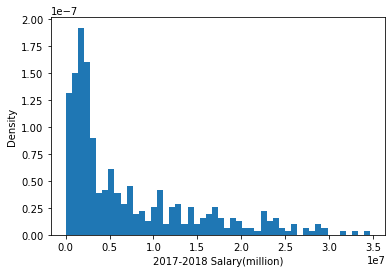

In [1214]:
plt.hist(stats_salary['salary17_18'],density=True,bins=50)
plt.xlabel('2017-2018 Salary(million)')
plt.ylabel('Density')

plt.show()

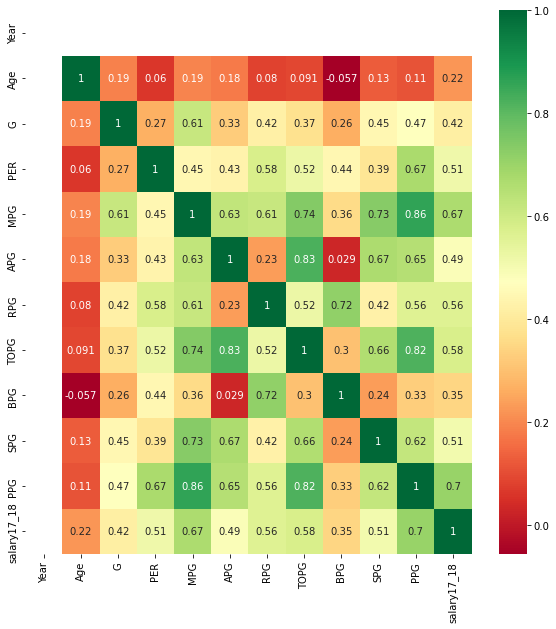

In [1215]:
corrmat = stats_salary.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(stats_salary[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1216]:

stats_salary.sort_values(by='PPG',ascending=False,inplace = True)
stats_salary[['Player','PPG']].head(15)

,Player,PPG
426,Russell Westbrook,31.580247
169,James Harden,29.086420
392,Isaiah Thomas,28.934211
102,Anthony Davis,27.986667
110,DeMar DeRozan,27.297297
252,Damian Lillard,26.986667
91,DeMarcus Cousins,26.972222
209,LeBron James,26.405405
245,Kawhi Leonard,25.513514
100,Stephen Curry,25.303797


In [1217]:
stats_salary.count()

Year           450
Player         450
Pos            450
Age            450
G              450
PER            450
MPG            450
APG            450
RPG            450
TOPG           450
BPG            450
SPG            450
PPG            450
salary17_18    450
dtype: int64

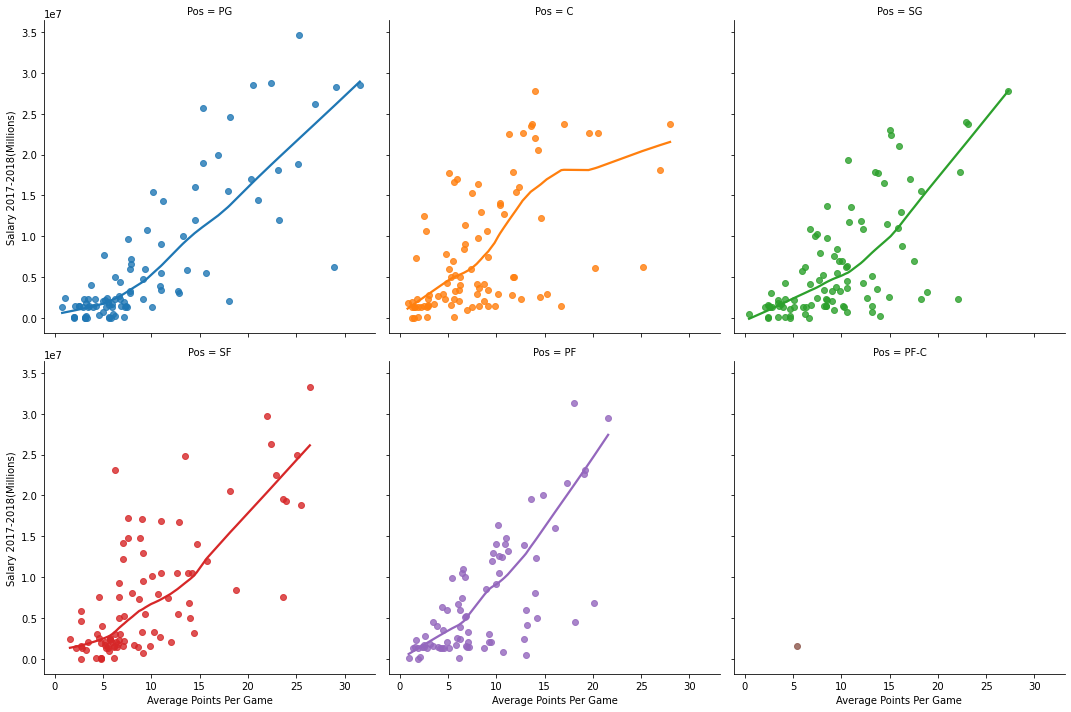

In [1218]:
sns.lmplot(x="PPG", y="salary17_18",hue="Pos",col="Pos",col_wrap=3, 
           data=stats_salary,lowess=True).set(xlabel='Average Points Per Game', ylabel='Salary 2017-2018(Millions)')

[Text(0.5, 0, 'Position'), Text(0, 0.5, 'Average Points Per Game')]

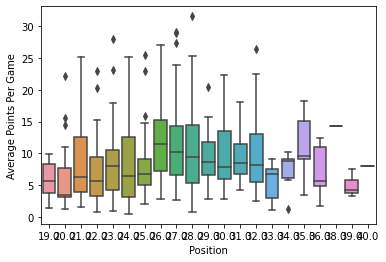

In [1229]:
sns.boxplot(x="", y="PPG", data=stats_salary).set(
    xlabel='Position', 
    ylabel='Average Points Per Game')

[0.11558257 0.09904983 0.09027966 0.10327949 0.09417513 0.10170579
 0.09820045 0.09521126 0.0984127  0.10410312]


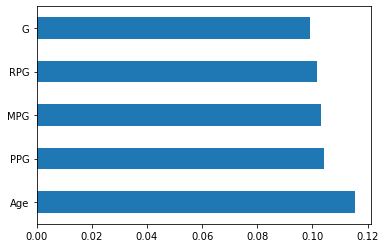

In [1219]:
X = stats_salary.iloc[:,3:13]  #independent columns
y = stats_salary.iloc[:,-1]    #target column i.e salary

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [1221]:
X = stats_salary.iloc[:,3:13]  #independent columns
y = stats_salary.iloc[:,-1] 
# Splitting data into train and test


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)


print((knn.score(X_test, y_test)))


0.5633185518755468


In [ ]:

params = {'n_neighbors':list(range(1,50))}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=10)
model.fit(X_train,y_train)
model.best_params_


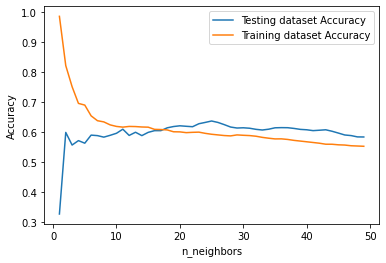

In [1225]:
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [1227]:
# use the best hyperparameters
knn = KNeighborsRegressor(n_neighbors = 25)
knn.fit(X_train, y_train)

print((knn.score(X_test, y_test)))

0.6373834047611436


In [1234]:
# use the best hyperparameters
knn = KNeighborsRegressor(n_neighbors = 25)
knn.fit(X_train, y_train)

print((knn.score(X_test, y_test)))

0.6373834047611436
